## PLOTS for ICCS'21 paper on Multi-objective irrigation
_____

Author: Mikhail.Gasanov@skoltech.ru

In [1]:
#Uncomment for Google Colab 


#!pip install pcse==5.4.2
#!pip install pymoo==0.4.2.1
#!git clone https://github.com/EDSEL-skoltech/multi_objective_irrigation.git
#%cd multi_objective_irrigation/



In [157]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import copy


from experiments.crop_model_en import Optimization

In [3]:
#colors for plots 

random_color_plot = '#fc8d59'
sugar_beet_color_plot = '#7b3294'
potato_color_plot = '#abd9e9'

## Load data for plots

In [149]:
for i in range(1,11):
    path_to_folder_with_data = os.path.join('./review_pymoo/review_npy_'+str(i))
    print(path_to_folder_with_data)
    #Sugar beet NSGA-II
    sugar_beet_crop_yield = np.load(path_to_folder_with_data+'/sugar_beet_crop_yields.npy')
    sugar_beet_irrigation_amount = np.load(path_to_folder_with_data+'/sugar_beet_irrigation_ammount.npy')
    sugar_beet_water_loss = np.load(path_to_folder_with_data+'/sugar_beet_water_loss.npy')
    sugar_beet_paretto_front = np.load(path_to_folder_with_data+'/sugar_beet_function_values_for_paretto.npy')
    sugar_beet_optimal_solution = np.load(path_to_folder_with_data+'/sugar_beet_optimal_solutions.npy',allow_pickle=True)

    # Potato NSGA-II
    potato_crop_yield = np.load(path_to_folder_with_data+'/potato_crop_yields.npy')
    potato_irrigation_amount = np.load(path_to_folder_with_data+'/potato_irrigation_ammount.npy')
    potato_water_loss = np.load(path_to_folder_with_data+'/potato_water_loss.npy')
    potato_paretto_front = np.load(path_to_folder_with_data+'/potato_function_values_for_paretto.npy')
    potato_optimal_solution = np.load(path_to_folder_with_data+'/potato_optimal_solutions.npy',allow_pickle=True)

    #Sugar beet Monte-Carlo
    
    path_to_folder_with_data = os.path.join('./review_pymoo/', 'random_review', 'random_search_'+str(i))
    random_crop_yield_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_crop_yields.npy'))
    random_water_loss_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_water_loss.npy'))
    random_irrigation_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_irrigation_ammount.npy'))
    sugar_beet_random = np.stack([random_crop_yield_sugar_beet, random_water_loss_sugar_beet], axis=1)

    #Potato Monte-Carlo
    random_crop_yield_potato = np.load(os.path.join(path_to_folder_with_data, 'potato_crop_yields.npy'))
    random_water_loss_potato = np.load(os.path.join(path_to_folder_with_data, 'potato_water_loss.npy'))
    random_irrigation_potato = np.load(os.path.join(path_to_folder_with_data, 'potato_irrigation_ammount.npy'))
    potato_random = np.stack([random_crop_yield_potato, random_water_loss_potato], axis=1)

./review_pymoo/review_npy_1
./review_pymoo/review_npy_2
./review_pymoo/review_npy_3
./review_pymoo/review_npy_4
./review_pymoo/review_npy_5
./review_pymoo/review_npy_6
./review_pymoo/review_npy_7
./review_pymoo/review_npy_8
./review_pymoo/review_npy_9
./review_pymoo/review_npy_10


# Crop yield forecating based on real farmer information

In [151]:
import pandas as pd
import numpy as np
import datetime as dt
import json
import argparse
import multiprocessing
import matplotlib.pyplot as plt


WOFOST = Optimization()
path_to_user_file = './util/input_data/malino_sugar_beet.json'
# path_to_user_file = args.path_to_user_file
with open(path_to_user_file, 'r') as f:
    WOFOST.user_parameters = json.load(f)

latitude = int(WOFOST.user_parameters['latitude'])
longitude = int(WOFOST.user_parameters['longitude'])
crop_name = WOFOST.user_parameters['crop_name']

#load historical weather data
path_CSV_dir = './data/meteo/'

def round_geoposition(x, prec=1, base=.5):
    return round(base * round(float(x)/base),prec)
latitude = round_geoposition(WOFOST.user_parameters['latitude'])
longitude = round_geoposition(WOFOST.user_parameters['longitude'])
WOFOST.weather_loader(path_CSV_dir, latitude, longitude)

WOFOST.data_dir = './util/input_data/'
crop_results=[]

# Range of year to compute mean crop yield and mean water loss
input_years = np.arange(WOFOST.NASA_last_year-20, WOFOST.NASA_last_year)
historical_yield = []
water_loss = []
for year in input_years:
    df_crop = WOFOST.crop_hpc(year)
    historical_yield.append(df_crop['TWSO'][-1])
    print('year', year, ', crop yield', "%.2f"% (df_crop['TWSO'][-1]/1000), 't/ha')
    water_loss.append(WOFOST.total_ammount_of_losed_water)
df_sugar_beet = pd.DataFrame({"range": input_years,"yield":historical_yield, "loss":water_loss})





LOAD FROM LOCAL CSV WEATHER DATABASE
year 1999 , crop yield 12.04 t/ha
year 2000 , crop yield 10.64 t/ha
year 2001 , crop yield 13.24 t/ha
year 2002 , crop yield 9.94 t/ha
year 2003 , crop yield 10.99 t/ha
year 2004 , crop yield 11.28 t/ha
year 2005 , crop yield 13.63 t/ha
year 2006 , crop yield 10.99 t/ha
year 2007 , crop yield 12.18 t/ha
year 2008 , crop yield 10.74 t/ha
year 2009 , crop yield 12.88 t/ha
year 2010 , crop yield 7.59 t/ha
year 2011 , crop yield 13.61 t/ha
year 2012 , crop yield 14.77 t/ha
year 2013 , crop yield 13.56 t/ha
year 2014 , crop yield 13.21 t/ha
year 2015 , crop yield 13.17 t/ha
year 2016 , crop yield 12.99 t/ha
year 2017 , crop yield 9.48 t/ha
year 2018 , crop yield 13.06 t/ha


## Potato crop yield

In [152]:
WOFOST = Optimization()
path_to_user_file = './util/input_data/malino_potato.json'
with open(path_to_user_file, 'r') as f:
    WOFOST.user_parameters = json.load(f)

latitude = int(WOFOST.user_parameters['latitude'])
longitude = int(WOFOST.user_parameters['longitude'])
crop_name = WOFOST.user_parameters['crop_name']

#load historical weather data
path_CSV_dir = './data/meteo/'


def round_geoposition(x, prec=1, base=.5):
    return round(base * round(float(x)/base),prec)
latitude = round_geoposition(WOFOST.user_parameters['latitude'])
longitude = round_geoposition(WOFOST.user_parameters['longitude'])
WOFOST.weather_loader(path_CSV_dir, latitude, longitude)

WOFOST.data_dir = './util/input_data/'
crop_results=[]


input_years = np.arange(WOFOST.NASA_last_year-20, WOFOST.NASA_last_year)
historical_yield = []
water_loss = []
for year in input_years:
    df_crop = WOFOST.crop_hpc(year)
    historical_yield.append(df_crop['TWSO'][-1])
    print('year', year, ', crop yield', "%.2f"% (df_crop['TWSO'][-1]/1000), 't/ha')
    water_loss.append(WOFOST.total_ammount_of_losed_water)
df_potato = pd.DataFrame({"range": input_years,"yield":historical_yield, "loss":water_loss})

LOAD FROM LOCAL CSV WEATHER DATABASE
year 1999 , crop yield 9.43 t/ha
year 2000 , crop yield 14.01 t/ha
year 2001 , crop yield 13.02 t/ha
year 2002 , crop yield 7.83 t/ha
year 2003 , crop yield 14.90 t/ha
year 2004 , crop yield 14.07 t/ha
year 2005 , crop yield 15.08 t/ha
year 2006 , crop yield 14.31 t/ha
year 2007 , crop yield 11.08 t/ha
year 2008 , crop yield 14.57 t/ha
year 2009 , crop yield 15.22 t/ha
year 2010 , crop yield 9.43 t/ha
year 2011 , crop yield 9.21 t/ha
year 2012 , crop yield 14.53 t/ha
year 2013 , crop yield 13.61 t/ha
year 2014 , crop yield 12.59 t/ha
year 2015 , crop yield 13.61 t/ha
year 2016 , crop yield 12.58 t/ha
year 2017 , crop yield 13.80 t/ha
year 2018 , crop yield 11.67 t/ha


# Summary plots


### How to identify 'optimal' solution based on Pareto-front

We used "weighted-sum" method from `pymoo` package

User (or Farmer) may estimate which objective function is more important for farming

We assumed that the importance of each of the objective functions is equal

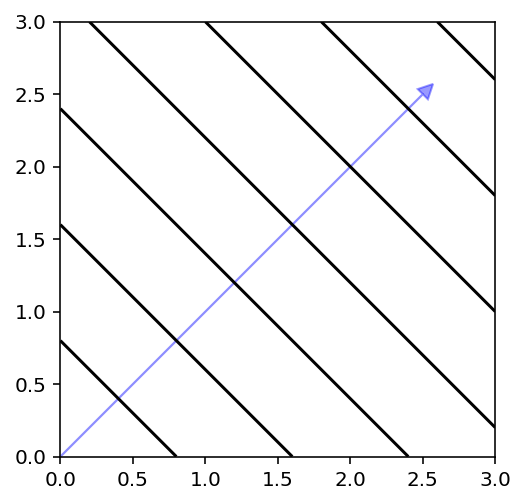

In [153]:
weights = np.array([0.5, 0.5])


## Decomposition

### Load and normalize paretto front fot potato crop

In [7]:
#Scientific plt style, Source: https://github.com/garrettj403/SciencePlots
plt.style.use(['science', 'grid'])
plt.rcParams.update({'font.size':16})


In [154]:
NSGA_potato_yield_review = []
NSGA_potato_water_loss_review = []

Random_potato_yield_review = []
Random_potato_water_loss_review = []


for i in range(1,11):
    path_to_folder_with_data = os.path.join('./review_pymoo/review_npy_'+str(i))
    print(path_to_folder_with_data)
    #Sugar beet NSGA-II
    sugar_beet_crop_yield = np.load(path_to_folder_with_data+'/sugar_beet_crop_yields.npy')
    sugar_beet_irrigation_amount = np.load(path_to_folder_with_data+'/sugar_beet_irrigation_ammount.npy')
    sugar_beet_water_loss = np.load(path_to_folder_with_data+'/sugar_beet_water_loss.npy')
    sugar_beet_paretto_front = np.load(path_to_folder_with_data+'/sugar_beet_function_values_for_paretto.npy')
    sugar_beet_optimal_solution = np.load(path_to_folder_with_data+'/sugar_beet_optimal_solutions.npy',allow_pickle=True)

    # Potato NSGA-II
    potato_crop_yield = np.load(path_to_folder_with_data+'/potato_crop_yields.npy')
    potato_irrigation_amount = np.load(path_to_folder_with_data+'/potato_irrigation_ammount.npy')
    potato_water_loss = np.load(path_to_folder_with_data+'/potato_water_loss.npy')
    potato_paretto_front = np.load(path_to_folder_with_data+'/potato_function_values_for_paretto.npy')
    potato_optimal_solution = np.load(path_to_folder_with_data+'/potato_optimal_solutions.npy',allow_pickle=True)

    #Sugar beet Monte-Carlo
    
    path_to_folder_with_data = os.path.join('./review_pymoo/', 'random_review', 'random_search_'+str(i))
    random_crop_yield_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_crop_yields.npy'))
    random_water_loss_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_water_loss.npy'))
    random_irrigation_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_irrigation_ammount.npy'))
    sugar_beet_random = np.stack([random_crop_yield_sugar_beet, random_water_loss_sugar_beet], axis=1)

    #Potato Monte-Carlo
    random_crop_yield_potato = np.load(os.path.join(path_to_folder_with_data, 'potato_crop_yields.npy'))
    random_water_loss_potato = np.load(os.path.join(path_to_folder_with_data, 'potato_water_loss.npy'))
    random_irrigation_potato = np.load(os.path.join(path_to_folder_with_data, 'potato_irrigation_ammount.npy'))
    potato_random = np.stack([random_crop_yield_potato, random_water_loss_potato], axis=1)
    from pymoo.factory import get_problem, get_visualization, get_decomposition

    #Farmer strategy
#     print(f"Farmer strategy: Crop Yield {df_potato['yield'].mean()/1000:.2f}, Water-loss {df_potato['loss'].mean():.2f} cm", '\n')


    #Load and normalize paretto front fot potato crop
    path_to_folder_with_data = os.path.join('./review_pymoo/review_npy_'+str(i))
    potato_paretto_front = np.load(path_to_folder_with_data+'/potato_function_values_for_paretto.npy')
    normalized_potato_paretto_front = copy.deepcopy(potato_paretto_front)
    normalized_potato_paretto_front[:, 0] = (potato_paretto_front[:, 0]-np.mean(potato_paretto_front[:, 0]))/np.std(potato_paretto_front[:, 0])
    normalized_potato_paretto_front[:, 1] = (potato_paretto_front[:, 1]-np.mean(potato_paretto_front[:, 1]))/np.std(potato_paretto_front[:, 1])


    # Return values of crop to original values
    normalized_potato_paretto_front[:, 0] = normalized_potato_paretto_front[:, 0] * -1

    decomp = get_decomposition("weighted-sum")
    I_paretto_potato = get_decomposition("weighted-sum").do(normalized_potato_paretto_front, weights).argmin()
    # print("Best regarding decomposition: Point %s - %s" % (I_paretto_potato, potato_paretto_front[I_paretto_potato]))


#     print("NSGA-II Results Objectives - Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % ( potato_paretto_front[I_paretto_potato][0], potato_paretto_front[I_paretto_potato][1]))

#     print('Increase in mean crop yield: %.1f' %((potato_paretto_front[I_paretto_potato][0]/(df_potato['yield'].mean()/1000)-1)*100),'%')
#     print('Increase in water loss: %.1f' %((potato_paretto_front[I_paretto_potato][1]/df_potato['loss'].mean()-1)*100),'% \n')
    
    
    NSGA_potato_yield_review.append(potato_paretto_front[I_paretto_potato][0])
    NSGA_potato_water_loss_review.append(potato_paretto_front[I_paretto_potato][1])
    
    # Load and normalize Monte-Carlo data for potato crop
    normalized_potato_random_search = copy.deepcopy(potato_random)


    normalized_potato_random_search[:,0]=(potato_random[:,0] - np.mean(potato_random[:,0]))/np.std(potato_random[:,0])
    normalized_potato_random_search[:,1]=(potato_random[:,1] - np.mean(potato_random[:,1]))/np.std(potato_random[:,1])

    normalized_potato_random_search[:,0] = normalized_potato_random_search[:,0] * -1

    decomp = get_decomposition("weighted-sum")
    I_random_potato = get_decomposition("weighted-sum").do(normalized_potato_random_search, weights).argmin()
#     print("The Monte-Carlo Search Results Objectives- Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % ( potato_random[I_random_potato][0], potato_random[I_random_potato][1]))
#     print('Increase in mean crop yield: %.1f' %((potato_random[I_random_potato][0]/(df_potato['yield'].mean()/1000)-1)*100),'%')
#     print('Increase in water loss: %.1f' %((potato_random[I_random_potato][1]/df_potato['loss'].mean()-1)*100),'% \n')
    
    Random_potato_water_loss_review.append(potato_random[I_random_potato][1])
    Random_potato_yield_review.append(potato_random[I_random_potato][0])

    #Plots

#     plt.figure(figsize=(13,8))
#     plt.scatter(potato_random[:,0], potato_random[:,1],facecolor=random_color_plot, s=10, alpha=0.07,marker='D' )


#     plt.scatter( potato_crop_yield, potato_water_loss, edgecolors='black', facecolor=potato_color_plot, s=10, alpha=0.07)

#     plt.scatter(potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1], edgecolors='black', facecolor=potato_color_plot, marker='o', s=130,  label = 'Ours')


#     # Real farmer solution
#     plt.scatter(potato_random[I_random_potato,0], potato_random[I_random_potato,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1, label='Monte-Carlo')
#     plt.scatter(df_potato['yield'].mean()/1000, df_potato['loss'].mean(), edgecolors='black',s = 60, marker='s', facecolor = 'green', label='Farmer solution')
    # plt.legend()

    # plt.savefig('./plots_ICCS/Random_search_and_optimizer_potato.png', dpi=300)
    # plt.savefig('./plots_ICCS/Random_search_and_optimizer_potato.svg' )

./review_pymoo/review_npy_1
./review_pymoo/review_npy_2
./review_pymoo/review_npy_3
./review_pymoo/review_npy_4
./review_pymoo/review_npy_5
./review_pymoo/review_npy_6
./review_pymoo/review_npy_7
./review_pymoo/review_npy_8
./review_pymoo/review_npy_9
./review_pymoo/review_npy_10


## Sugar-beet 10 times

In [155]:
NSGA_sugar_beet_yield_review = []
NSGA_sugar_beet_water_loss_review = []

Random_sugar_beet_yield_review = []
Random_sugar_beet_water_loss_review = []


for i in range(1,11):
    path_to_folder_with_data = os.path.join('./review_pymoo/review_npy_'+str(i))
    print(path_to_folder_with_data)
    #Sugar beet NSGA-II
    sugar_beet_crop_yield = np.load(path_to_folder_with_data+'/sugar_beet_crop_yields.npy')
    sugar_beet_irrigation_amount = np.load(path_to_folder_with_data+'/sugar_beet_irrigation_ammount.npy')
    sugar_beet_water_loss = np.load(path_to_folder_with_data+'/sugar_beet_water_loss.npy')
    sugar_beet_paretto_front = np.load(path_to_folder_with_data+'/sugar_beet_function_values_for_paretto.npy')
    sugar_beet_optimal_solution = np.load(path_to_folder_with_data+'/sugar_beet_optimal_solutions.npy',allow_pickle=True)

    #Sugar beet Monte-Carlo
    
    path_to_folder_with_data = os.path.join('./review_pymoo/', 'random_review', 'random_search_'+str(i))
    random_crop_yield_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_crop_yields.npy'))
    random_water_loss_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_water_loss.npy'))
    random_irrigation_sugar_beet = np.load(os.path.join(path_to_folder_with_data, 'sugar_beet_irrigation_ammount.npy'))
    sugar_beet_random = np.stack([random_crop_yield_sugar_beet, random_water_loss_sugar_beet], axis=1)

    from pymoo.factory import get_problem, get_visualization, get_decomposition

#     print(f"Farmer strategy: Crop Yield {df_sugar_beet['yield'].mean()/1000:.2f}, Water-loss {df_sugar_beet['loss'].mean():.2f} cm", '\n')

    #Load and normalize paretto front fot potato crop
    path_to_folder_with_data = os.path.join('./review_pymoo/review_npy_'+str(i))
    sugar_beet_paretto_front = np.load(path_to_folder_with_data+'/sugar_beet_function_values_for_paretto.npy')
    normalized_sugar_beet_paretto_front = copy.deepcopy(sugar_beet_paretto_front)
    normalized_sugar_beet_paretto_front[:, 0] = (sugar_beet_paretto_front[:, 0]-np.mean(sugar_beet_paretto_front[:, 0]))/np.std(sugar_beet_paretto_front[:, 0])
    normalized_sugar_beet_paretto_front[:, 1] = (sugar_beet_paretto_front[:, 1]-np.mean(sugar_beet_paretto_front[:, 1]))/np.std(sugar_beet_paretto_front[:, 1])


    # Return values of crop to original values
    normalized_sugar_beet_paretto_front[:, 0] = normalized_sugar_beet_paretto_front[:, 0] * -1

    decomp = get_decomposition("weighted-sum")
    I_paretto_sugar_beet = get_decomposition("weighted-sum").do(normalized_sugar_beet_paretto_front, weights).argmin()


#     print("NSGA-II Results Objectives - Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % ( sugar_beet_paretto_front[I_paretto_sugar_beet][0], sugar_beet_paretto_front[I_paretto_sugar_beet][1]))
#     print('Increase in mean crop yield: %.1f' %((sugar_beet_paretto_front[I_paretto_sugar_beet][0]/(df_sugar_beet['yield'].mean()/1000)-1)*100))
#     print('Increase in water loss: %.1f' %((sugar_beet_paretto_front[I_paretto_sugar_beet][1]/df_sugar_beet['loss'].mean()-1)*100),'% \n')

    NSGA_sugar_beet_water_loss_review.append(sugar_beet_paretto_front[I_paretto_sugar_beet][1])
    NSGA_sugar_beet_yield_review.append(sugar_beet_paretto_front[I_paretto_sugar_beet][0])
    # Load and normalize Monte-Carlo data for sugar-beet crop 

    normalized_sugar_beet_random_search = copy.deepcopy(sugar_beet_random)
    normalized_sugar_beet_random_search[:,0]=(sugar_beet_random[:,0] - np.mean(sugar_beet_random[:,0]))/np.std(sugar_beet_random[:,0])
    normalized_sugar_beet_random_search[:,1]=(sugar_beet_random[:,1] - np.mean(sugar_beet_random[:,1]))/np.std(sugar_beet_random[:,1])
    normalized_sugar_beet_random_search[:,0] = normalized_sugar_beet_random_search[:,0] * -1

    decomp = get_decomposition("weighted-sum")
    I_random_sugar_beet = get_decomposition("weighted-sum").do(normalized_sugar_beet_random_search, weights).argmin()

#     print("The Monte-Carlo Search Results Objectives- Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % ( sugar_beet_random[I_random_sugar_beet][0], sugar_beet_random[I_random_sugar_beet][1]))
#     print('Increase in mean crop yield: %.1f' %((sugar_beet_random[I_random_sugar_beet][0]/(df_sugar_beet['yield'].mean()/1000)-1)*100),'%')
#     print('Increase in water loss: %.1f' %((sugar_beet_random[I_random_sugar_beet][1]/df_sugar_beet['loss'].mean()-1)*100),'% \n')
    Random_sugar_beet_water_loss_review.append(sugar_beet_random[I_random_sugar_beet][1])
    Random_sugar_beet_yield_review.append(sugar_beet_random[I_random_sugar_beet][0])



#     plt.figure(figsize=(13,8))
#     plt.scatter(sugar_beet_random[:,0], sugar_beet_random[:,1],facecolor=random_color_plot, s=10, alpha=0.07, marker='D' )


#     plt.scatter( sugar_beet_crop_yield, sugar_beet_water_loss, edgecolors='black', facecolor=sugar_beet_color_plot, s=10, alpha=0.07)

#     plt.scatter(sugar_beet_paretto_front[I_paretto_sugar_beet,0], sugar_beet_paretto_front[I_paretto_sugar_beet,1], edgecolors='black', facecolor=sugar_beet_color_plot, marker='o', s=130, label = 'Ours')


#     # Real farmer solution
#     plt.scatter(sugar_beet_random[I_random_sugar_beet,0], sugar_beet_random[I_random_sugar_beet,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1, label='Monte-Carlo')
#     plt.scatter(df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean(), edgecolors='black',s = 60, marker='s', color = 'green', label='Farmer solution')

#     plt.legend()
    # plt.savefig('./plots_ICCS/Random_search_and_optimizer_sugar_beet.png', dpi=300)
    # plt.savefig('./plots_ICCS/Random_search_and_optimizer_sugar_beet.svg' )


./review_pymoo/review_npy_1
./review_pymoo/review_npy_2
./review_pymoo/review_npy_3
./review_pymoo/review_npy_4
./review_pymoo/review_npy_5
./review_pymoo/review_npy_6
./review_pymoo/review_npy_7
./review_pymoo/review_npy_8
./review_pymoo/review_npy_9
./review_pymoo/review_npy_10


## Review 10 times run

In [156]:
print(f'NSGA-II Potato - Yield - Mean: {np.mean(NSGA_potato_yield_review):.2f}, \
- Std: {np.std(NSGA_potato_yield_review):.2f}')
print(f'NSGA-II Potato - Water loss - Mean: {np.mean(NSGA_potato_water_loss_review):.2f}, \
- Std: {np.std(NSGA_potato_water_loss_review):.2f}')
print('\n')
print(f'Monte-Carlo Potato - Yield - Mean: {np.mean(Random_potato_yield_review):.2f}, \
- Std: {np.std(Random_potato_yield_review):.2f}')
print(f'Monte-Carlo Potato - Water loss - Mean: {np.mean(Random_potato_water_loss_review):.2f}, \
- Std: {np.std(Random_potato_water_loss_review):.2f}')
print('\n')

print(f'NSGA-II Sugar-beet - Yield - Mean: {np.mean(NSGA_sugar_beet_yield_review):.2f}, \
- Std: {np.std(NSGA_sugar_beet_yield_review):.2f}')
print(f'NSGA-II Sugar-beet - Water loss - Mean: {np.mean(NSGA_sugar_beet_water_loss_review):.2f}, \
- Std: {np.std(NSGA_sugar_beet_water_loss_review):.2f}')
print('\n')
print(f'Monte-Carlo Sugar-beet - Yield - Mean: {np.mean(Random_sugar_beet_yield_review):.2f}, \
- Std: {np.std(Random_sugar_beet_yield_review):.2f}')
print(f'Monte-Carlo Sugar-beet - Water loss - Mean: {np.mean(Random_sugar_beet_water_loss_review):.2f}, \
- Std: {np.std(Random_sugar_beet_water_loss_review):.2f}')

NSGA-II Potato - Yield - Mean: 14.11, - Std: 0.09
NSGA-II Potato - Water loss - Mean: 26.84, - Std: 1.40


Monte-Carlo Potato - Yield - Mean: 13.95, - Std: 0.18
Monte-Carlo Potato - Water loss - Mean: 34.54, - Std: 2.26


NSGA-II Sugar-beet - Yield - Mean: 12.16, - Std: 0.03
NSGA-II Sugar-beet - Water loss - Mean: 28.22, - Std: 0.98


Monte-Carlo Sugar-beet - Yield - Mean: 12.17, - Std: 0.03
Monte-Carlo Sugar-beet - Water loss - Mean: 42.38, - Std: 2.97


Farmer strategy: Crop Yield 12.73, Water-loss 24.08 cm 

NSGA-II Results Objectives - Crop Yield - 13.97 t/ha, Water-loss - 24.67 cm
Increase in mean crop yield: 9.7 %
Increase in water loss: 2.5 % 

The Monte-Carlo Search Results Objectives- Crop Yield - 13.77 t/ha, Water-loss - 31.92 cm
Increase in mean crop yield: 8.2 %
Increase in water loss: 32.6 % 



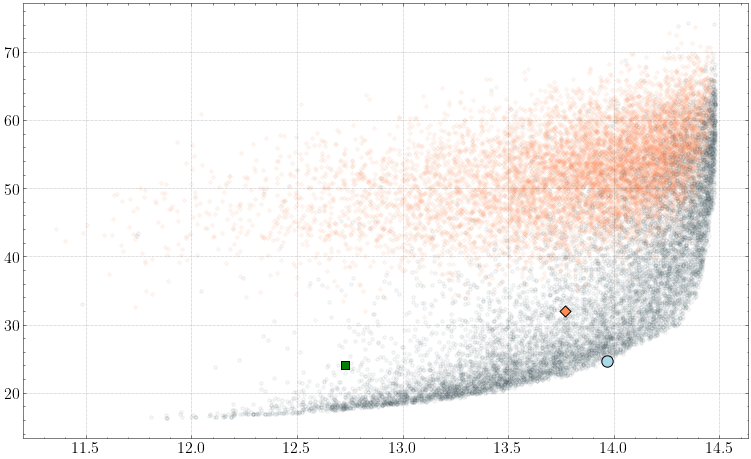

In [44]:


from pymoo.factory import get_problem, get_visualization, get_decomposition

#Farmer strategy
print(f"Farmer strategy: Crop Yield {df_potato['yield'].mean()/1000:.2f}, Water-loss {df_potato['loss'].mean():.2f} cm", '\n')


#Load and normalize paretto front fot potato crop

potato_paretto_front = np.load(path_to_folder_with_data+'/steps_300_normal_weather/potato_for_paretto.npy')
normalized_potato_paretto_front = copy.deepcopy(potato_paretto_front)
normalized_potato_paretto_front[:, 0] = (potato_paretto_front[:, 0]-np.mean(potato_paretto_front[:, 0]))/np.std(potato_paretto_front[:, 0])
normalized_potato_paretto_front[:, 1] = (potato_paretto_front[:, 1]-np.mean(potato_paretto_front[:, 1]))/np.std(potato_paretto_front[:, 1])


# Return values of crop to original values
normalized_potato_paretto_front[:, 0] = normalized_potato_paretto_front[:, 0] * -1

decomp = get_decomposition("weighted-sum")
I_paretto_potato = get_decomposition("weighted-sum").do(normalized_potato_paretto_front, weights).argmin()
# print("Best regarding decomposition: Point %s - %s" % (I_paretto_potato, potato_paretto_front[I_paretto_potato]))


print("NSGA-II Results Objectives - Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % ( potato_paretto_front[I_paretto_potato][0], potato_paretto_front[I_paretto_potato][1]))

print('Increase in mean crop yield: %.1f' %((potato_paretto_front[I_paretto_potato][0]/(df_potato['yield'].mean()/1000)-1)*100),'%')
print('Increase in water loss: %.1f' %((potato_paretto_front[I_paretto_potato][1]/df_potato['loss'].mean()-1)*100),'% \n')







# Load and normalize Monte-Carlo data for potato crop 

folders_for_plots = sorted(os.listdir(path_to_folder_with_data))[:5]
random_crop_yield_potato = np.array([])
random_water_loss_potato = np.array([])
for folder in folders_for_plots:
    _crop = np.load(os.path.join(path_to_folder_with_data, folder, 'potatocrop_yields.npy'))
    random_crop_yield_potato = np.append(random_crop_yield_potato, _crop)
    _water_loss = np.load(os.path.join(path_to_folder_with_data, folder, 'potatowater_loss.npy'))
    random_water_loss_potato = np.append(random_water_loss_potato, _water_loss)
potato_random = np.stack([random_crop_yield_potato, random_water_loss_potato], axis=1)

normalized_potato_random_search = copy.deepcopy(potato_random)


normalized_potato_random_search[:,0]=(potato_random[:,0] - np.mean(potato_random[:,0]))/np.std(potato_random[:,0])
normalized_potato_random_search[:,1]=(potato_random[:,1] - np.mean(potato_random[:,1]))/np.std(potato_random[:,1])

normalized_potato_random_search[:,0] = normalized_potato_random_search[:,0] * -1


decomp = get_decomposition("weighted-sum")
I_random_potato = get_decomposition("weighted-sum").do(normalized_potato_random_search, weights).argmin()
print("The Monte-Carlo Search Results Objectives- Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % ( potato_random[I_random_potato][0], potato_random[I_random_potato][1]))
print('Increase in mean crop yield: %.1f' %((potato_random[I_random_potato][0]/(df_potato['yield'].mean()/1000)-1)*100),'%')
print('Increase in water loss: %.1f' %((potato_random[I_random_potato][1]/df_potato['loss'].mean()-1)*100),'% \n')






#Plots

plt.figure(figsize=(13,8))
plt.scatter(potato_random[:,0], potato_random[:,1],facecolor=random_color_plot, s=10, alpha=0.07,marker='D' )


plt.scatter( potato_crop_yield, potato_water_loss, edgecolors='black', facecolor=potato_color_plot, s=10, alpha=0.07)

plt.scatter(potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1], edgecolors='black', facecolor=potato_color_plot, marker='o', s=130,  label = 'Ours')


# Real farmer solution
plt.scatter(potato_random[I_random_potato,0], potato_random[I_random_potato,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1, label='Monte-Carlo')
plt.scatter(df_potato['yield'].mean()/1000, df_potato['loss'].mean(), edgecolors='black',s = 60, marker='s', facecolor = 'green', label='Farmer solution')
# plt.legend()

# plt.savefig('./plots_ICCS/Random_search_and_optimizer_potato.png', dpi=300)
# plt.savefig('./plots_ICCS/Random_search_and_optimizer_potato.svg' )

### Pareto front - potato

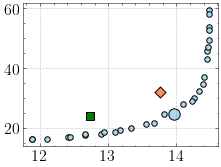

In [15]:
plt.figure(figsize=(13,8))
plt.scatter(potato_random[I_random_potato,0], potato_random[I_random_potato,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1)
plt.scatter(potato_paretto_front[:, 0], potato_paretto_front[:,1], edgecolors='black',facecolor=potato_color_plot, s =30)
plt.scatter(df_potato['yield'].mean()/1000, df_potato['loss'].mean(), edgecolors='black',s = 60, marker='s', facecolor = 'green', label='Farmer solution')
plt.scatter(potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1], edgecolors='black', facecolor=potato_color_plot, marker='o', s=130)

# plt.savefig('./plots_ICCS/Pareto_front_potato.png', dpi=300)
# plt.savefig('./plots_ICCS/Pareto_front_potato.svg' )


##  Load data for sugar-beet crop 


Farmer strategy: Crop Yield 12.00, Water-loss 31.69 cm 

NSGA-II Results Objectives - Crop Yield - 12.17 t/ha, Water-loss - 30.31 cm
Increase in mean crop yield: 1.4
Increase in water loss: -4.3 % 

The Monte-Carlo Search Results Objectives- Crop Yield - 12.15 t/ha, Water-loss - 40.70 cm
Increase in mean crop yield: 1.2 %
Increase in water loss: 28.4 % 



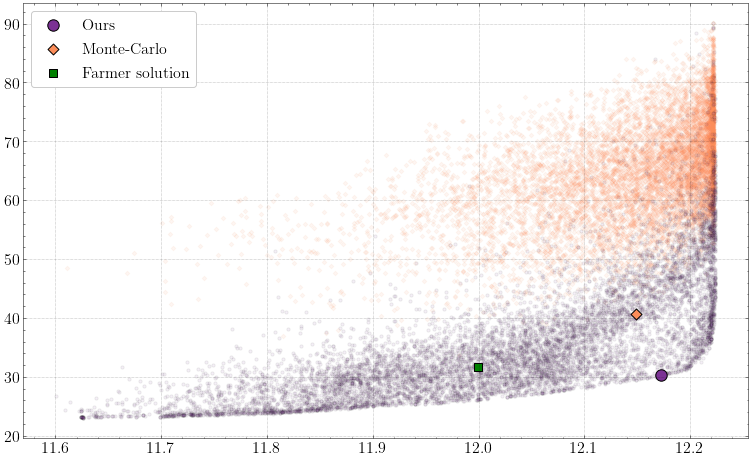

In [45]:


from pymoo.factory import get_problem, get_visualization, get_decomposition

print(f"Farmer strategy: Crop Yield {df_sugar_beet['yield'].mean()/1000:.2f}, Water-loss {df_sugar_beet['loss'].mean():.2f} cm", '\n')

#Load and normalize paretto front fot potato crop

sugar_beet_paretto_front = np.load(path_to_folder_with_data+'/steps_300_normal_weather/sugar_beet_for_paretto.npy')
normalized_sugar_beet_paretto_front = copy.deepcopy(sugar_beet_paretto_front)
normalized_sugar_beet_paretto_front[:, 0] = (sugar_beet_paretto_front[:, 0]-np.mean(sugar_beet_paretto_front[:, 0]))/np.std(sugar_beet_paretto_front[:, 0])
normalized_sugar_beet_paretto_front[:, 1] = (sugar_beet_paretto_front[:, 1]-np.mean(sugar_beet_paretto_front[:, 1]))/np.std(sugar_beet_paretto_front[:, 1])


# Return values of crop to original values
normalized_sugar_beet_paretto_front[:, 0] = normalized_sugar_beet_paretto_front[:, 0] * -1

decomp = get_decomposition("weighted-sum")
I_paretto_sugar_beet = get_decomposition("weighted-sum").do(normalized_sugar_beet_paretto_front, weights).argmin()


print("NSGA-II Results Objectives - Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % ( sugar_beet_paretto_front[I_paretto_sugar_beet][0], sugar_beet_paretto_front[I_paretto_sugar_beet][1]))
print('Increase in mean crop yield: %.1f' %((sugar_beet_paretto_front[I_paretto_sugar_beet][0]/(df_sugar_beet['yield'].mean()/1000)-1)*100))
print('Increase in water loss: %.1f' %((sugar_beet_paretto_front[I_paretto_sugar_beet][1]/df_sugar_beet['loss'].mean()-1)*100),'% \n')







# Load and normalize Monte-Carlo data for sugar-beet crop 

folders_for_plots = sorted(os.listdir(path_to_folder_with_data))[:5]
random_crop_yield_sugar_beet = np.array([])
random_water_loss_sugar_beet = np.array([])
for folder in folders_for_plots:
    _crop = np.load(os.path.join(path_to_folder_with_data, folder, 'sugar_beetcrop_yields.npy'))
    random_crop_yield_sugar_beet = np.append(random_crop_yield_sugar_beet, _crop)
    _water_loss = np.load(os.path.join(path_to_folder_with_data, folder, 'sugar_beetwater_loss.npy'))
    random_water_loss_sugar_beet = np.append(random_water_loss_sugar_beet, _water_loss)
sugar_beet_random = np.stack([random_crop_yield_sugar_beet, random_water_loss_sugar_beet], axis=1)

normalized_sugar_beet_random_search = copy.deepcopy(sugar_beet_random)


normalized_sugar_beet_random_search[:,0]=(sugar_beet_random[:,0] - np.mean(sugar_beet_random[:,0]))/np.std(sugar_beet_random[:,0])
normalized_sugar_beet_random_search[:,1]=(sugar_beet_random[:,1] - np.mean(sugar_beet_random[:,1]))/np.std(sugar_beet_random[:,1])

normalized_sugar_beet_random_search[:,0] = normalized_sugar_beet_random_search[:,0] * -1


decomp = get_decomposition("weighted-sum")
I_random_sugar_beet = get_decomposition("weighted-sum").do(normalized_sugar_beet_random_search, weights).argmin()


print("The Monte-Carlo Search Results Objectives- Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % ( sugar_beet_random[I_random_sugar_beet][0], sugar_beet_random[I_random_sugar_beet][1]))
print('Increase in mean crop yield: %.1f' %((sugar_beet_random[I_random_sugar_beet][0]/(df_sugar_beet['yield'].mean()/1000)-1)*100),'%')
print('Increase in water loss: %.1f' %((sugar_beet_random[I_random_sugar_beet][1]/df_sugar_beet['loss'].mean()-1)*100),'% \n')




plt.figure(figsize=(13,8))
plt.scatter(sugar_beet_random[:,0], sugar_beet_random[:,1],facecolor=random_color_plot, s=10, alpha=0.07, marker='D' )


plt.scatter( sugar_beet_crop_yield, sugar_beet_water_loss, edgecolors='black', facecolor=sugar_beet_color_plot, s=10, alpha=0.07)

plt.scatter(sugar_beet_paretto_front[I_paretto_sugar_beet,0], sugar_beet_paretto_front[I_paretto_sugar_beet,1], edgecolors='black', facecolor=sugar_beet_color_plot, marker='o', s=130, label = 'Ours')


# Real farmer solution
plt.scatter(sugar_beet_random[I_random_sugar_beet,0], sugar_beet_random[I_random_sugar_beet,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1, label='Monte-Carlo')
plt.scatter(df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean(), edgecolors='black',s = 60, marker='s', color = 'green', label='Farmer solution')

plt.legend()
# plt.savefig('./plots_ICCS/Random_search_and_optimizer_sugar_beet.png', dpi=300)
# plt.savefig('./plots_ICCS/Random_search_and_optimizer_sugar_beet.svg' )


### Pareto front - sugar-beet

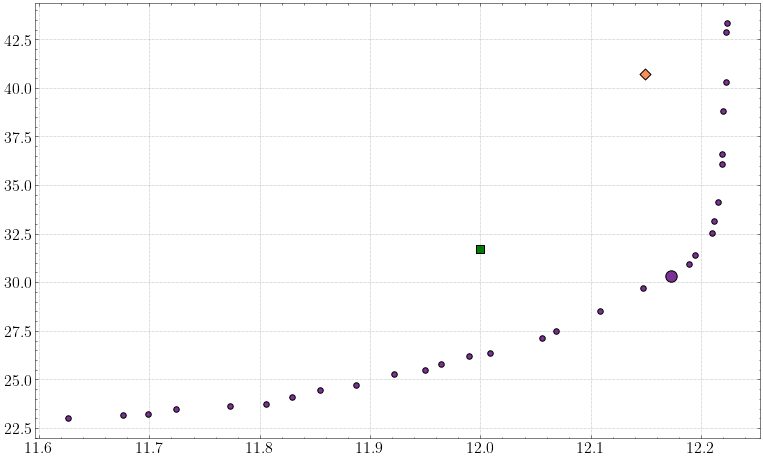

In [46]:
plt.figure(figsize=(13,8))
plt.scatter(sugar_beet_random[I_random_sugar_beet,0], sugar_beet_random[I_random_sugar_beet,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1)
plt.scatter(sugar_beet_paretto_front[:, 0], sugar_beet_paretto_front[:,1], edgecolors='black',facecolor=sugar_beet_color_plot, s =30)
plt.scatter(df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean(), edgecolors='black',s = 60, marker='s', color = 'green', label='Farmer solution')
plt.scatter(sugar_beet_paretto_front[I_paretto_sugar_beet,0], sugar_beet_paretto_front[I_paretto_sugar_beet,1], edgecolors='black', facecolor=sugar_beet_color_plot, marker='o', s=130)


# plt.savefig('./plots_ICCS/Pareto_front_sugar_beet.png', dpi=300)
# plt.savefig('./plots_ICCS/Pareto_front_sugar_beet.svg' )


# Barplots to compare Water loss value and Crop yield
____
### For NSGA-II, Monte-Carlo and Farmer solution

## Potato

In [161]:
import seaborn as sns

<Figure size 432x288 with 0 Axes>

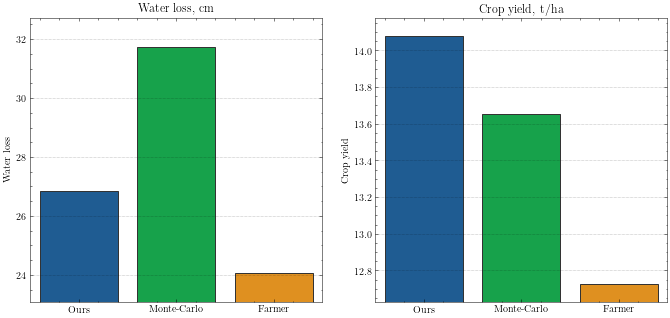

In [162]:
methods=['Ours', 'Monte-Carlo', 'Farmer']
ours = [potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1]]
mc_search = [potato_random[I_random_potato,0], potato_random[I_random_potato,1]]
farmer = [df_potato['yield'].mean()/1000, df_potato['loss'].mean()]
df_bar_plot = pd.DataFrame({'Method':methods, 'Crop yield':[ours[0],mc_search[0],farmer[0] ], 'Water loss':[ours[1],mc_search[1],farmer[1] ]})


plt.style.use(['science', 'grid'])
plt.figure(figsize=(6,4))

fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig.tight_layout(pad=3.0)
sns.barplot(x='Method', y='Water loss',data=df_bar_plot, edgecolor=".2", ax=ax1)
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2)
ax1.set_ylim(min(df_bar_plot['Water loss'])-1.,max(df_bar_plot['Water loss'])+1.)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax1.set_title('Water loss, cm')
ax2.set_xlabel('')
ax2.set_title('Crop yield, t/ha')
plt.show()

## Sugar-beet 

<Figure size 432x288 with 0 Axes>

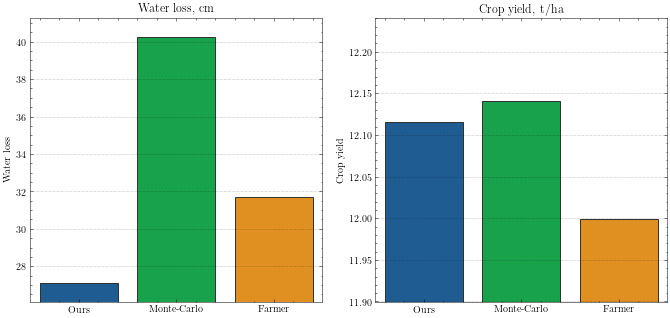

In [163]:
methods=['Ours', 'Monte-Carlo', 'Farmer']
ours = [sugar_beet_paretto_front[I_paretto_sugar_beet,0], sugar_beet_paretto_front[I_paretto_sugar_beet,1]]
mc_search = [sugar_beet_random[I_random_sugar_beet,0], sugar_beet_random[I_random_sugar_beet,1]]
farmer = [df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean()]
df_bar_plot = pd.DataFrame({'Method':methods, 'Crop yield':[ours[0],mc_search[0],farmer[0] ], 'Water loss':[ours[1],mc_search[1],farmer[1] ]})


plt.style.use(['science', 'grid'])
plt.figure(figsize=(6,4))
fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig.tight_layout(pad=3.0)
sns.barplot(x='Method', y='Water loss',data=df_bar_plot, edgecolor=".2", ax=ax1)
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2)
ax1.set_ylim(min(df_bar_plot['Water loss'])-1.,max(df_bar_plot['Water loss'])+1.)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax1.set_title('Water loss, cm')
ax2.set_xlabel('')
ax2.set_title('Crop yield, t/ha')
plt.show()


# Potato WUE

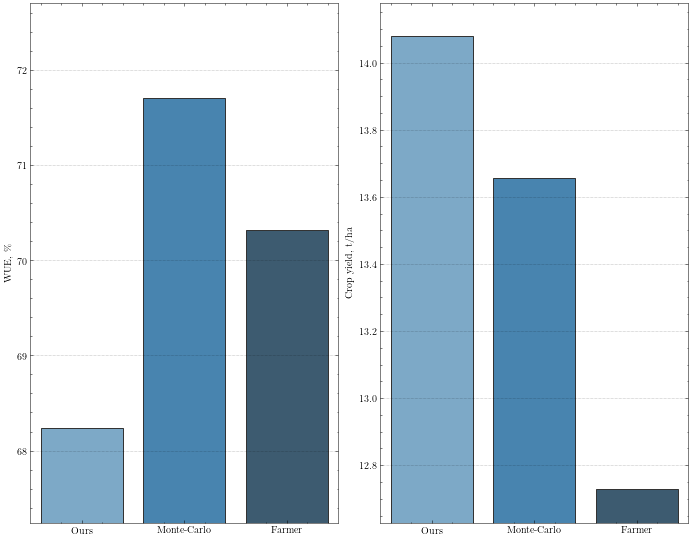

In [164]:
df_w = pd.DataFrame(WOFOST.weather.export())
df_w['DAY']=pd.to_datetime(df_w['DAY'])
df_w.set_index('DAY', inplace = True)
rain_a = np.array(df_w.groupby(pd.Grouper(freq='Y')).sum()['RAIN'][16:-2])



WUE_ours = 1 - potato_paretto_front[I_paretto_potato][1]/(np.mean(rain_a)+np.sum(potato_optimal_solution[I_paretto_potato][7:]))
WUE_Monte_Carlo = 1 - potato_random[I_random_potato][1]/(np.mean(rain_a) +random_irrigation_potato[np.where(random_water_loss_potato==potato_random[I_random_potato,1])][0])
WUE_farmer = 1 - df_potato['loss'].mean()/(np.mean(rain_a)+np.sum(WOFOST.user_parameters['irrigation_ammounts']))
# print(WUE_ours, WUE_Monte_Carlo, WUE_farmer)

methods=['Ours', 'Monte-Carlo', 'Farmer']
ours = [potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1]]
mc_search = [potato_random[I_random_potato,0], potato_random[I_random_potato,1]]
farmer = [df_potato['yield'].mean()/1000, df_potato['loss'].mean()]
df_bar_plot = pd.DataFrame({'Method':methods, 'Crop yield':[ours[0],mc_search[0],farmer[0] ], 'WUE':[WUE_ours, WUE_Monte_Carlo, WUE_farmer]})
df_bar_plot['WUE'] = df_bar_plot['WUE']*100

plt.style.use(['science', 'grid'])

fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(10,8))
fig.tight_layout(pad=2.0)
sns.barplot(x='Method', y='WUE',data=df_bar_plot, edgecolor=".2",ax=ax1 ,palette="Blues_d")
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2 , palette="Blues_d")
ax1.set_ylim(min(df_bar_plot['WUE'])-1,max(df_bar_plot['WUE'])+1)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax1.set_ylabel('WUE, \%')
ax2.set_ylabel('Crop yield, t/ha')
ax2.set_xlabel('')



# plt.savefig('./plots_ICCS/Intro_potato_GA.svg')
plt.show()

# Sugar beet

In [165]:
label_size = 14
plt.rcParams['ytick.labelsize'] = label_size 

In [168]:
print(f'NSGA-II Potato - Yield - Mean: {np.mean(NSGA_potato_yield_review):.2f}, \
- Std: {np.std(NSGA_potato_yield_review):.2f}')
print(f'NSGA-II Potato - Water loss - Mean: {np.mean(NSGA_potato_water_loss_review):.2f}, \
- Std: {np.std(NSGA_potato_water_loss_review):.2f}')
print('\n')
print(f'Monte-Carlo Potato - Yield - Mean: {np.mean(Random_potato_yield_review):.2f}, \
- Std: {np.std(Random_potato_yield_review):.2f}')
print(f'Monte-Carlo Potato - Water loss - Mean: {np.mean(Random_potato_water_loss_review):.2f}, \
- Std: {np.std(Random_potato_water_loss_review):.2f}')
print('\n')

print(f'NSGA-II Sugar-beet - Yield - Mean: {np.mean(NSGA_sugar_beet_yield_review):.2f}, \
- Std: {np.std(NSGA_sugar_beet_yield_review):.2f}')
print(f'NSGA-II Sugar-beet - Water loss - Mean: {np.mean(NSGA_sugar_beet_water_loss_review):.2f}, \
- Std: {np.std(NSGA_sugar_beet_water_loss_review):.2f}')
print('\n')
print(f'Monte-Carlo Sugar-beet - Yield - Mean: {np.mean(Random_sugar_beet_yield_review):.2f}, \
- Std: {np.std(Random_sugar_beet_yield_review):.2f}')
print(f'Monte-Carlo Sugar-beet - Water loss - Mean: {np.mean(Random_sugar_beet_water_loss_review):.2f}, \
- Std: {np.std(Random_sugar_beet_water_loss_review):.2f}')

NSGA-II Potato - Yield - Mean: 14.11, - Std: 0.09
NSGA-II Potato - Water loss - Mean: 26.84, - Std: 1.40


Monte-Carlo Potato - Yield - Mean: 13.95, - Std: 0.18
Monte-Carlo Potato - Water loss - Mean: 34.54, - Std: 2.26


NSGA-II Sugar-beet - Yield - Mean: 12.16, - Std: 0.03
NSGA-II Sugar-beet - Water loss - Mean: 28.22, - Std: 0.98


Monte-Carlo Sugar-beet - Yield - Mean: 12.17, - Std: 0.03
Monte-Carlo Sugar-beet - Water loss - Mean: 42.38, - Std: 2.97


In [174]:
np.mean(NSGA_sugar_beet_water_loss_review)

28.222461361801642

In [177]:
sugar_beet_optimal_solution[I_paretto_potato]

array([89, 120, 142, 106, 141, 144, 106, 3.527738407359072,
       1.0520416366980587, 12.257480825082236, 4.370068029989442,
       8.678532014005135, 1.0093128591597043, 12.637187067033423],
      dtype=object)

In [205]:
np.mean(1 - NSGA_sugar_beet_water_loss_review / total_water)

0.7449401778021958

In [202]:
WUE_ours

0.7449401778021958

In [201]:
NSGA_loss = np.mean(NSGA_sugar_beet_water_loss_review)
NSGA_std = np.std((NSGA_sugar_beet_water_loss_review))
total_water =np.mean(rain_a)+np.sum(sugar_beet_optimal_solution[I_paretto_potato][7:])
WUE_ours = 1 - NSGA_loss/total_water
# WUE_ours_std = NSGA_std/NSGA_loss

In [207]:

total_water =np.mean(rain_a)+np.sum(sugar_beet_optimal_solution[I_paretto_potato][7:])
WUE_ours = np.mean(1 - NSGA_sugar_beet_water_loss_review / total_water)
WUE_ours_std = np.std(1 - NSGA_sugar_beet_water_loss_review / total_water)

r_water = random_irrigation_sugar_beet[np.where(random_water_loss_sugar_beet==sugar_beet_random[I_random_sugar_beet,1])][0]
total_water = np.mean(rain_a)+r_water
WUE_Monte_Carlo = np.mean(1 - Random_sugar_beet_yield_review/total_water)
WUE_Monte_Carlo_std = np.std(1 - Random_sugar_beet_yield_review/total_water)

total_water =(np.mean(rain_a)+np.sum(WOFOST.user_parameters['irrigation_ammounts']))
WUE_farmer = np.mean(1 - np.array(water_sugar['Mean'])/total_water)
WUE_farmer_std = np.std(1 - np.array(water_sugar['Mean'])/total_water)

mc_search = np.mean(Random_sugar_beet_yield_review), np.std(Random_sugar_beet_yield_review)
ours = np.mean(NSGA_sugar_beet_yield_review), np.std(NSGA_sugar_beet_yield_review) 
farmer = np.mean(sugar_bet_res['Mean']), np.std(sugar_bet_res['Mean'])




df_bar_plot = pd.DataFrame({'Method':methods, 
                            'Crop yield':[ours[0],mc_search[0],farmer[0]],
                            'Crop_error':[ours[1],mc_search[1],farmer[1]],
                            'WUE':[WUE_ours, WUE_Monte_Carlo, WUE_farmer],
                          'WUE_error':[WUE_ours_std, WUE_Monte_Carlo_std, WUE_farmer_std]})

In [208]:
df_bar_plot

,Method,Crop yield,Crop_error,WUE,WUE_error
0,Ours,12.155424,0.025587,0.744940,0.008828
1,Monte-Carlo,12.170312,0.032124,0.879642,0.000318
2,Farmer,11.962636,0.119034,0.609248,0.002195


In [167]:
methods=['Ours', 'Monte Carlo', 'Farmer']
ours = [sugar_beet_paretto_front[I_paretto_sugar_beet,0], 
        sugar_beet_paretto_front[I_paretto_sugar_beet,1]]
mc_search = [sugar_beet_random[I_random_sugar_beet,0],
             sugar_beet_random[I_random_sugar_beet,1]]
farmer = [df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean()]

df_bar_plot = pd.DataFrame({'Method':methods, 
                            'Crop yield':[ours[0],mc_search[0],farmer[0] ], 
                            'WUE':[WUE_ours, WUE_Monte_Carlo, WUE_farmer]})

df_bar_plot

,Method,Crop yield,WUE
0,Ours,12.115419,75.521116
1,Monte-Carlo,12.140617,60.170595
2,Farmer,11.999334,60.939391


0.7552111582924222 0.6017059547769366 0.6093939060513196


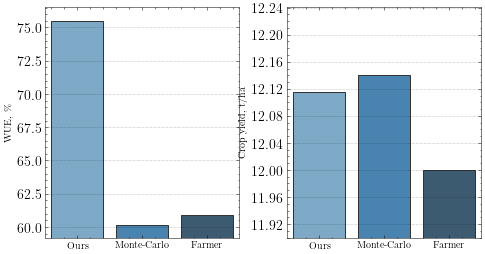

In [166]:
from matplotlib.ticker import MaxNLocator

my_colors = 'myg'

WUE_ours = 1 - sugar_beet_paretto_front[I_paretto_sugar_beet][1]/(np.mean(rain_a)+
                                                                  np.sum(sugar_beet_optimal_solution[I_paretto_potato][7:]))
WUE_Monte_Carlo = 1 - sugar_beet_random[I_random_sugar_beet][1]/(np.mean(rain_a)+
                                                                 random_irrigation_sugar_beet[np.where(random_water_loss_sugar_beet==sugar_beet_random[I_random_sugar_beet,1])][0])
WUE_farmer = 1 - df_sugar_beet['loss'].mean()/(np.mean(rain_a)+
                                               np.sum(WOFOST.user_parameters['irrigation_ammounts']))
print(WUE_ours, WUE_Monte_Carlo, WUE_farmer)

methods=['Ours', 'Monte-Carlo', 'Farmer']
ours = [sugar_beet_paretto_front[I_paretto_sugar_beet,0], 
        sugar_beet_paretto_front[I_paretto_sugar_beet,1]]
mc_search = [sugar_beet_random[I_random_sugar_beet,0], 
             sugar_beet_random[I_random_sugar_beet,1]]
farmer = [df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean()]


df_bar_plot = pd.DataFrame({'Method':methods,
                            'Crop yield':[ours[0],mc_search[0],farmer[0] ], 
                            'WUE':[WUE_ours, WUE_Monte_Carlo, WUE_farmer]})
df_bar_plot['WUE'] = df_bar_plot['WUE']*100

plt.style.use(['science', 'grid'])


fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(7,4))
fig.tight_layout(pad=2.0)
sns.barplot(x='Method', y='WUE',data=df_bar_plot, edgecolor=".2",ax=ax1 ,palette="Blues_d")
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2 , palette="Blues_d")
ax1.set_ylim(min(df_bar_plot['WUE'])-1,max(df_bar_plot['WUE'])+1)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('WUE, \%')
ax2.set_ylabel('Crop yield, t/ha')
ax2.set_xlabel('')

# plt.savefig('./experiments/plots_ICCS/Intro_graphical_f.svg')
plt.show()

## Water loss and irrigation water joint distribution

In [30]:
# Sugar-beet data 
sugar_beet_crop_yield = np.load(path_to_folder_with_data+'/steps_300_normal_weather/sugar_beet_crop_yields.npy')
sugar_beet_irrigation_amount = np.load(path_to_folder_with_data+'/steps_300_normal_weather/sugar_beet_irrifation_ammount.npy')
sugar_beet_water_loss = np.load(path_to_folder_with_data+'/steps_300_normal_weather/sugar_beet_water_loss.npy')
sugar_beet_paretto_front = np.load(path_to_folder_with_data+'/steps_300_normal_weather/sugar_beet_function_values_for_paretto.npy')
sugar_beet_optimal_solution = np.load(path_to_folder_with_data+'/steps_300_normal_weather/sugar_beet_optimal_solutions.npy',allow_pickle=True)

# Potato data 
potato_crop_yield = np.load(path_to_folder_with_data+'/steps_300_normal_weather/potato_crop_yields.npy')
potato_irrigation_amount = np.load(path_to_folder_with_data+'/steps_300_normal_weather/potato_irrifation_ammount.npy')
potato_water_loss = np.load(path_to_folder_with_data+'/steps_300_normal_weather/potato_water_loss.npy')
potato_paretto_front = np.load(path_to_folder_with_data+'/steps_300_normal_weather/potato_function_values_for_paretto.npy')
potato_optimal_solution = np.load(path_to_folder_with_data+'/steps_300_normal_weather/potato_optimal_solutions.npy',allow_pickle=True)



folders_for_plots = sorted(os.listdir(path_to_folder_with_data))[:5]
random_crop_yield_sugar_beet = np.array([])
random_water_loss_sugar_beet = np.array([])
random_irrigation_sugar_beet = np.array([])
for folder in folders_for_plots:
    _crop = np.load(os.path.join(path_to_folder_with_data, folder, 'sugar_beetcrop_yields.npy'))
    random_crop_yield_sugar_beet = np.append(random_crop_yield_sugar_beet, _crop)
    _water_loss = np.load(os.path.join(path_to_folder_with_data, folder, 'sugar_beetwater_loss.npy'))
    random_water_loss_sugar_beet = np.append(random_water_loss_sugar_beet, _water_loss)
    _irrigation = np.load(os.path.join(path_to_folder_with_data, folder, 'sugar_beetirrifation_ammount.npy'))
    random_irrigation_sugar_beet = np.append(random_irrigation_sugar_beet, _irrigation)
sugar_beet_random = np.stack([random_crop_yield_sugar_beet, random_water_loss_sugar_beet], axis=1)





folders_for_plots = sorted(os.listdir(path_to_folder_with_data))[:5]
random_crop_yield_potato = np.array([])
random_water_loss_potato = np.array([])
random_irrigation_potato = np.array([])
for folder in folders_for_plots:
    _crop = np.load(os.path.join(path_to_folder_with_data, folder, 'potatocrop_yields.npy'))
    random_crop_yield_potato = np.append(random_crop_yield_potato, _crop)
    _water_loss = np.load(os.path.join(path_to_folder_with_data, folder, 'potatowater_loss.npy'))
    random_water_loss_potato = np.append(random_water_loss_potato, _water_loss)
    _irrigation = np.load(os.path.join(path_to_folder_with_data, folder, 'potatoirrifation_ammount.npy'))
    random_irrigation_potato = np.append(random_irrigation_potato, _irrigation)
potato_random = np.stack([random_crop_yield_potato, random_water_loss_potato], axis=1)
water_array = np.load(path_to_folder_with_data + 'water_array.npy')

## Monte-Carlo search

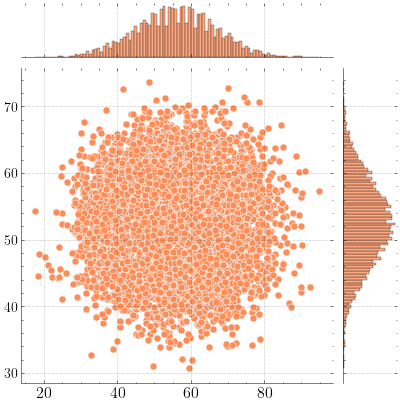

In [31]:


sns.jointplot(x=water_array, 
              y=random_water_loss_potato, 
              color="#fc8d59",
              s=50,
              marginal_kws=dict(bins=100))

# plt.savefig('./plots_ICCS/Joint_plot_random.png', dpi=300)
# plt.savefig('./plots_ICCS/Joint_plot_random.svg' )


## Potato NSGA-II

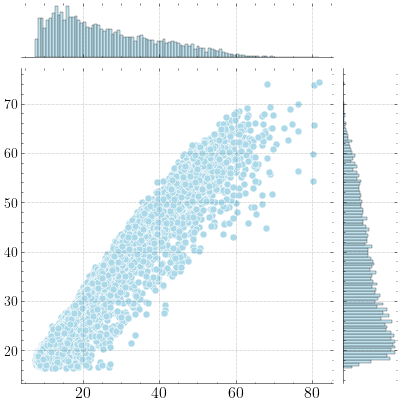

In [32]:
sns.jointplot(x=potato_irrigation_amount, 
              y=potato_water_loss, 
              color="#abd9e9",
              s=50,
              marginal_kws=dict(bins=100))

# plt.savefig('./plots_ICCS/Joint_plot_potato.png', dpi=300)
# plt.savefig('./plots_ICCS/Joint_plot_potato.svg' )


## Sugar-beet NSGA-II

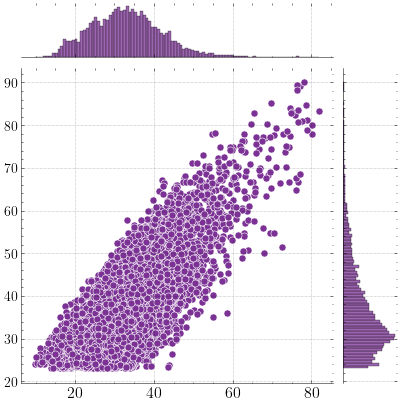

In [33]:
sns.jointplot(x=sugar_beet_irrigation_amount, 
              y=sugar_beet_water_loss, 
              color="#7b3294",
              s=50,
              marginal_kws=dict(bins=100))

# plt.savefig('./plots_ICCS/Joint_plot_sugar_beet.png', dpi=300)
# plt.savefig('./plots_ICCS/Joint_plot_sugar_beet.svg' )


# Review

## Farmer simulations

In [77]:
import pandas as pd
import numpy as np
import datetime as dt
import json
import argparse
import multiprocessing
import matplotlib.pyplot as plt


path_to_farmer_data = './util/input_data/malino_sugar_beet.json'


def round_geoposition(x, prec=1, base=.5):
    return round(base * round(float(x)/base),prec)


def random_time(date):
    '''
    date -> str
    '''
    
    time = datetime.datetime.strptime(date, '%Y-%m-%d')
    new_time = time + datetime.timedelta(days = int(np.random.choice(range(-2,2))))
    return datetime.datetime.strftime(new_time, '%Y-%m-%d')


def farmer_multi_run(path_to_farmer_data):
    WOFOST = Optimization()
    path_to_user_file = path_to_farmer_data
    with open(path_to_user_file, 'r') as f:
        WOFOST.user_parameters = json.load(f)
    
    WOFOST.user_parameters['crop_start'] = random_time(WOFOST.user_parameters['crop_start'])
    WOFOST.user_parameters['crop_end'] = random_time(WOFOST.user_parameters['crop_end'])

    new_date = []
    for date in WOFOST.user_parameters['irrigation_events']:
        new_date.append(random_time(date))

    WOFOST.user_parameters['irrigation_events'] = new_date
    latitude = int(WOFOST.user_parameters['latitude'])
    longitude = int(WOFOST.user_parameters['longitude'])
    crop_name = WOFOST.user_parameters['crop_name']
    path_CSV_dir = './data/meteo/'

    latitude = round_geoposition(WOFOST.user_parameters['latitude'])
    longitude = round_geoposition(WOFOST.user_parameters['longitude'])
    WOFOST.weather_loader(path_CSV_dir, latitude, longitude)

    WOFOST.data_dir = './util/input_data/'
    crop_results=[]

    input_years = np.arange(WOFOST.NASA_last_year-20, WOFOST.NASA_last_year)
    historical_yield, water_loss = [], []
    for year in input_years:
        df_crop = WOFOST.crop_hpc(year)
        historical_yield.append(df_crop['TWSO'][-1]/1000)
        water_loss.append(WOFOST.total_ammount_of_losed_water)
    df_sugar_beet = pd.DataFrame({"range": input_years,"yield":historical_yield, "loss":water_loss})
    return df_sugar_beet['yield'].mean(), df_sugar_beet['yield'].std(), np.mean(water_loss), np.std(water_loss)


In [262]:
from tqdm.notebook import tqdm
path_to_farmer_data = './util/input_data/malino_sugar_beet.json'
potato_res = {key:list() for key in ['Mean', 'Std']} 
sugar_bet_res = {key:list() for key in ['Mean', 'Std']} 
water_potato = {key:list() for key in ['Mean', 'Std']} 
water_sugar = {key:list() for key in ['Mean', 'Std']} 
for i in tqdm(range(10)):
    mean, std, mean_water, std_water = farmer_multi_run('./util/input_data/malino_sugar_beet.json')
    sugar_bet_res['Mean'].append(mean)
    sugar_bet_res['Std'].append(std)
    water_sugar['Mean'].append(mean_water)
    water_sugar['Std'].append(std_water)
    mean, std, mean_water, std_water = farmer_multi_run('./util/input_data/malino_potato.json')
    potato_res['Mean'].append(mean)
    potato_res['Std'].append(std)
    water_potato['Mean'].append(mean_water)
    water_potato['Std'].append(std_water)

LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE
LOAD FROM LOCAL CSV WEATHER DATABASE



In [266]:
print('Potato Yield Mean',np.round(np.mean(potato_res['Mean']),2), 
      'Std: ', np.round(np.std(potato_res['Mean']),2))

print('Sugar-beet Yield Mean:', np.round(np.mean(sugar_bet_res['Mean']),2), 
      'Std: ', np.round(np.std(sugar_bet_res['Mean']),2))

print('\n')

print('Potato Loss Mean',np.round(np.mean(water_potato['Mean']),2), 
      'Std: ', np.round(np.std(water_potato['Mean']),2))

print('Sugar-beet Loss Mean:', np.round(np.mean(water_sugar['Mean']),2),
      'Std: ', np.round(np.std(water_sugar['Mean']),2))



Potato Yield Mean 12.74 Std:  0.03
Sugar-beet Yield Mean: 11.97 Std:  0.1


Potato Loss Mean 24.0 Std:  0.21
Sugar-beet Loss Mean: 31.73 Std:  0.17


In [296]:
print(np.mean(1 - np.array(NSGA_sugar_beet_water_loss_review)/Random_sugar_beet_water_loss_review))
print(np.mean(1 - np.array(water_sugar['Mean'])/Random_sugar_beet_water_loss_review))

print(np.std(1 - np.array(NSGA_sugar_beet_water_loss_review)/Random_sugar_beet_water_loss_review))
print(np.std(1 - np.array(water_sugar['Mean'])/Random_sugar_beet_water_loss_review))

0.33150048697310674
0.24787478678799751
0.04310879148633197
0.050800633531873716


In [298]:
df_bar_plot

,Method,Crop yield,Crop_error,WUE,WUE_error
0,Ours,12.155424,0.025587,33.150049,0.043109
1,Monte-Carlo,12.170312,0.032124,57.424513,0.036572
2,Farmer,11.970545,0.100883,0.000000,0.000000


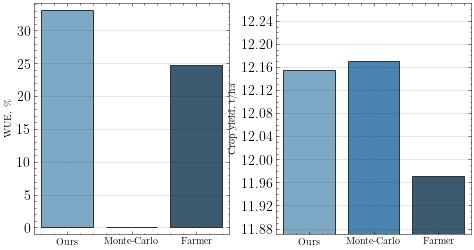

In [300]:
from matplotlib.ticker import MaxNLocator

my_colors = 'myg'


WUE_ours = np.mean(1 - np.array(NSGA_sugar_beet_water_loss_review)/Random_sugar_beet_water_loss_review)
WUE_ours_std = np.std(1 - np.array(NSGA_sugar_beet_water_loss_review)/Random_sugar_beet_water_loss_review)


WUE_Monte_Carlo = 0
WUE_Monte_Carlo_std = 0

WUE_farmer = np.mean(1 - np.array(water_sugar['Mean'])/Random_sugar_beet_water_loss_review)
WUE_farmer_std = np.std(1 - np.array(water_sugar['Mean'])/Random_sugar_beet_water_loss_review)

mc_search = [np.mean(Random_sugar_beet_yield_review), 
             np.std(Random_sugar_beet_yield_review)]
ours = np.mean(NSGA_sugar_beet_yield_review), np.std(NSGA_sugar_beet_yield_review) 
farmer = np.mean(sugar_bet_res['Mean']), np.std(sugar_bet_res['Mean'])




df_bar_plot = pd.DataFrame({'Method':methods, 
                            'Crop yield':[ours[0],mc_search[0],farmer[0]],
                            'Crop_error':[ours[1],mc_search[1],farmer[1]],
                            'WUE':[WUE_ours, WUE_Monte_Carlo, WUE_farmer],
                          'WUE_error':[WUE_ours_std, WUE_Monte_Carlo_std, WUE_farmer_std]})
df_bar_plot['WUE'] = df_bar_plot['WUE']*100

plt.style.use(['science', 'grid'])


fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(7,4))
fig.tight_layout(pad=2.0)
sns.barplot(x='Method', y='WUE',data=df_bar_plot, edgecolor=".2",ax=ax1 ,palette="Blues_d")
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2 , palette="Blues_d")
ax1.set_ylim(min(df_bar_plot['WUE'])-1,max(df_bar_plot['WUE'])+1)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('WUE, \%')
ax2.set_ylabel('Crop yield, t/ha')
ax2.set_xlabel('')

# plt.savefig('./experiments/plots_ICCS/Intro_graphical_f.svg')
plt.show()

In [219]:
print('NSGA-II', np.mean(NSGA_potato_water_loss_review))
print('MC', np.mean(Random_potato_water_loss_review))
print('Farmer', np.mean(water_potato['Mean']))

NSGA-II 26.840827380773483
MC 34.536383937259714
Farmer 23.993723882501786


In [235]:
np.mean(rain_a)+np.sum(potato_optimal_solution[I_paretto_potato][7:])

84.5518928015707

In [231]:
np.where(random_water_loss_potato==potato_random[I_random_potato,1])#[0]

(array([6104]),)

In [248]:
r_water = random_irrigation_potato[np.where(random_water_loss_potato==potato_random[I_random_potato,1])][0]
total_water = np.mean(rain_a)+r_water
# print(total_water)
# WUE_Monte_Carlo = np.mean(1 - Random_potato_water_loss_review/total_water)
np.mean(1-Random_potato_water_loss_review/total_water)

0.6919639670948492

In [249]:
total_water =np.mean(rain_a)+np.sum(potato_optimal_solution[I_paretto_potato][7:])
# print(total_water)
# WUE_ours = np.mean(1 - NSGA_potato_water_loss_review / total_water)
np.mean(1 - NSGA_potato_water_loss_review/total_water)

0.6825520222975439

In [260]:
print(np.mean(NSGA_potato_water_loss_review)/np.mean(Random_potato_water_loss_review))
print(np.mean(water_potato['Mean'])/np.mean(Random_potato_water_loss_review))

0.7771753820415505
0.6947375824316124


112.11800000000002
112.11800000000002


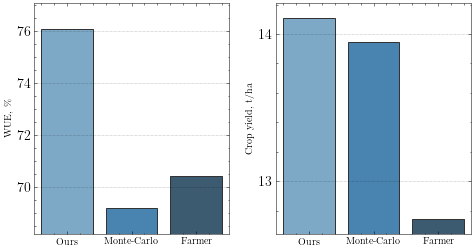

In [252]:
from matplotlib.ticker import MaxNLocator

my_colors = 'myg'

total_water =np.mean(rain_a)+np.sum(potato_optimal_solution[I_paretto_potato][7:])
total_water = np.mean(rain_a)+r_water

print(total_water)
WUE_ours = np.mean(1 - NSGA_potato_water_loss_review / total_water)
WUE_ours_std = np.std(1 - NSGA_potato_water_loss_review / total_water)

r_water = random_irrigation_potato[np.where(random_water_loss_potato==potato_random[I_random_potato,1])][0]
total_water = np.mean(rain_a)+r_water
# total_water =np.mean(rain_a)+np.sum(potato_optimal_solution[I_paretto_potato][7:])
print(total_water)
WUE_Monte_Carlo = np.mean(1 - Random_potato_water_loss_review/total_water)
WUE_Monte_Carlo_std = np.std(1 - Random_potato_water_loss_review/total_water)

total_water =(np.mean(rain_a)+np.sum(WOFOST.user_parameters['irrigation_ammounts']))
WUE_farmer = np.mean(1 - np.array(water_potato['Mean'])/total_water)
WUE_farmer_std = np.std(1 - np.array(water_potato['Mean'])/total_water)

mc_search = [np.mean(Random_potato_yield_review), 
             np.std(Random_potato_yield_review)]
ours = np.mean(NSGA_potato_yield_review), np.std(NSGA_potato_yield_review) 
farmer = np.mean(potato_res['Mean']), np.std(potato_res['Mean'])




df_bar_plot = pd.DataFrame({'Method':methods, 
                            'Crop yield':[ours[0],mc_search[0],farmer[0]],
                            'Crop_error':[ours[1],mc_search[1],farmer[1]],
                            'WUE':[WUE_ours, WUE_Monte_Carlo, WUE_farmer],
                          'WUE_error':[WUE_ours_std, WUE_Monte_Carlo_std, WUE_farmer_std]})
df_bar_plot['WUE'] = df_bar_plot['WUE']*100

plt.style.use(['science', 'grid'])


fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(7,4))
fig.tight_layout(pad=2.0)
sns.barplot(x='Method', y='WUE',data=df_bar_plot, edgecolor=".2",ax=ax1 ,palette="Blues_d")
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2 , palette="Blues_d")
ax1.set_ylim(min(df_bar_plot['WUE'])-1,max(df_bar_plot['WUE'])+1)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('WUE, \%')
ax2.set_ylabel('Crop yield, t/ha')
ax2.set_xlabel('')

# plt.savefig('./experiments/plots_ICCS/Intro_graphical_f.svg')
plt.show()

In [76]:
colors = ['#636EFA',] * len(df_potato)
colors[np.argmin(df_potato['yield'])] = 'crimson'
colors[np.argmax(df_potato['yield'])] = '#00CC96'


colors_new = ['#636EFA',] * len(df_potato)
colors_new[np.argmin(df_potato['yield'])] = 'crimson'
colors_new[np.argmax(df_potato['yield'])] = '#00CC96'



fig = go.Figure()

fig.add_trace(go.Bar(x=df_potato['range'],
    y=df_potato['yield']/1000,
    text=np.round(df_potato['yield']/1000, decimals=2),
    textposition='auto',
    marker_color=colors_new))
fig.update_xaxes(title_text='Год')
fig.update_yaxes(title_text='Урожайность, т/га')
fig.update_layout(width=800, height=400,
                 font_family='Times New Roman',
                 font=dict(
                    family='Times New Roman',
                    size=18
                ))

# fig.write_image('./plots_ICCS/hist_yield_potato.svg', scale=4)

In [77]:
colors = ['#636EFA',] * len(df_sugar_beet)
colors[np.argmin(df_sugar_beet['yield'])] = 'crimson'
colors[np.argmax(df_sugar_beet['yield'])] = '#00CC96'


colors_new = ['#636EFA',] * len(df_sugar_beet)
colors_new[np.argmin(df_sugar_beet['yield'])] = 'crimson'
colors_new[np.argmax(df_sugar_beet['yield'])] = '#00CC96'



fig = go.Figure()

fig.add_trace(go.Bar(x=df_sugar_beet['range'],
    y=df_sugar_beet['yield']/1000,
    text=np.round(df_sugar_beet['yield']/1000, decimals=2),
    textposition='auto',
    marker_color=colors_new))
fig.update_xaxes(title_text='Год')
fig.update_yaxes(title_text='Урожайность, т/га')

fig.update_layout(width=800, height=400,
                 font_family='Times New Roman',
                 font=dict(
                    family='Times New Roman',
                    size=18
                ))

# fig.write_image('./plots_ICCS/hist_yield_sugar_beet.svg', scale=4)